In [ ]:
!pip install openvino2tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 KB 3.0 MB/s eta 0:00:00


In [ ]:
!pip install onnx==1.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached onnx-1.9.0-cp38-cp38-manylinux2010_x86_64.whl (12.2 MB)
  Attempting uninstall: onnx
    Found existing installation: onnx 1.13.0
    Uninstalling onnx-1.13.0:
      Successfully uninstalled onnx-1.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnx-tf 1.10.0 requires onnx>=1.10.2, but you have onnx 1.9.0 which is incompatible.


In [ ]:
!pip install onnx-tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
  Attempting uninstall: onnx
    Found existing installation: onnx 1.9.0
    Uninstalling onnx-1.9.0:
      Successfully uninstalled onnx-1.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 23.1.4 which is incompatib

In [ ]:
!pip install onnxruntime==1.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.1 MB/s eta 0:00:00


In [ ]:
!pip install spicy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mxnet==1.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.7/38.7 MB 10.3 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
!pip install tflite-support-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.4/222.4 KB 24.9 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 23.1.4 which is incompatible.


In [ ]:
!pip install tflite-support

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 13.1 MB/s eta 0:00:00


In [ ]:
# onnx path
onnx_path = '/content/drive/MyDrive/FaceID/webface_r50.onnx'


import os
import tensorflow as tf
import onnx
from onnx_tf.backend import prepare
assert os.path.exists(onnx_path)
import onnxruntime as ort
from tensorflow import lite
from numpy.random import RandomState
import numpy as np
import spicy
import mxnet as mx
from PIL import Image
import cv2
from io import BytesIO
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import torch

import random
from tqdm import tqdm_notebook
import random
import threading
from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity

from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

from collections import namedtuple
Batch = namedtuple('Batch', ['data'])

from onnx import checker
from mxnet.contrib import onnx as onnx_mxnet

## Convert from MXNET to ONNX

In [ ]:
!unzip /content/drive/MyDrive/FaceID/model-y1.zip 

Archive:  /content/drive/MyDrive/FaceID/model-y1.zip
   creating: model-y1-test2/
  inflating: model-y1-test2/model-symbol.json  
  inflating: model-y1-test2/log      
  inflating: model-y1-test2/model-0000.params  


In [ ]:
# Downloaded input symbol and params files
sym = '/content/model-y1-test2/model-symbol.json'
params = '/content/model-y1-test2/model-0000.params'

# Standard Imagenet input - 3 channels, 112 * 112
in_shapes = [(1, 3, 112, 112)]
in_types = [np.float32]

# Path of the output file
onnx_file = './mxnet_exported_mfn.onnx'

converted_model_path = onnx_mxnet.export_model(sym, params, in_shapes, in_types, onnx_file)

In [ ]:
sym, args, aux = mx.model.load_checkpoint('/content/model-y1-test2/model', 0)
img = mx.image.imread('/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_0/0.jpg')
img = mx.image.imresize(img, 112, 112) # resize
img = img.transpose((2, 0, 1)) # Channel first
img = img.expand_dims(axis=0) # batchify
img = img.astype(dtype='float32')
args['data'] = img

In [ ]:
ctx = mx.cpu()
exe = sym.bind(ctx=mx.cpu(), args=args, aux_states=aux, grad_req='null')

In [ ]:
onnx.__version__

'1.13.0'

In [ ]:
%run /content/mxnet2onnx.py --params /content/model-y1-test2/model-0000.params --output ./mfn_9_1_2023.onnx

mxnet version: 1.8.0
onnx version: 1.9.0
fixgamma list: ['fc1']
(1, 128) (1, 128)
[ 0.5201293  -0.03249294  0.44530004  0.47799265 -0.05494691  0.5869447
 -0.4910162   0.31916562  0.00124818  0.22073585  0.31185248  0.28678572
 -0.28528336  0.0664451  -0.07687357 -0.07222705  0.14842562  0.12403666
 -0.3196871   0.8964955 ]
[ 0.52012914 -0.03249307  0.44530004  0.47799236 -0.05494704  0.58694553
 -0.49101615  0.31916624  0.00124817  0.22073638  0.31185266  0.28678414
 -0.28528342  0.06644586 -0.07687392 -0.07222743  0.14842564  0.12403721
 -0.31968755  0.8964958 ]


In [ ]:
ort_sess = ort.InferenceSession('/content/mfn_9_1_2023.onnx')

## Use OPENVINO

In [ ]:
!sudo add-apt-repository -y ppa:deadsnakes/ppa
!sudo apt-get -y update
!sudo apt-get -y install python3.9
!sudo apt-get -y install python3.9-dev
!sudo apt-get -y install python3-pip
!sudo apt-get -y install python3.9-distutils
!python3.9 -m pip install -U setuptools \
  && python3.9 -m pip install -U pip \
  && python3.9 -m pip install -U distlib
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2
!python3.9 -m pip install tensorflow==2.10.0 \
  && python3.9 -m pip install -U onnx \
  && python3.9 -m pip install -U nvidia-pyindex \
  && python3.9 -m pip install -U onnx-graphsurgeon \
  && python3.9 -m pip install -U onnxsim \
  && python3.9 -m pip install -U simple_onnx_processing_tools \
  && python3.9 -m pip install -U onnx2tf \
  && python3.9 -m pip install -U protobuf==3.20.3

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [3,127 kB]
Get:14 http://ppa.l

In [ ]:
!onnx2tf -i /content/mfn_9_1_2023.onnx


Model optimizing started ============================================================
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/onnx2tf/onnx2tf.py", line 440, in convert
    result = subprocess.check_output(
  File "/usr/lib/python3.9/subprocess.py", line 424, in check_output
    return run(*popenargs, stdout=PIPE, timeout=timeout, check=True,
  File "/usr/lib/python3.9/subprocess.py", line 528, in run
    raise CalledProcessError(retcode, process.args,
subprocess.CalledProcessError: Command '['onnxsim', '/content/mfn_9_1_2023.onnx', '/content/mfn_9_1_2023.onnx']' returned non-zero exit status 1.

Automatic generation of each OP name started ========================================
Automatic generation of each OP name complete!

Model loaded ========================================================================

Model convertion started ============================================================
INFO: input_op_name: data shape: [1, 3, 112, 11

## CONVERT ONNX TO TFLITE

In [ ]:
onnx_model = onnx.load('/content/mfn_4_1_2023.onnx') #load onnx model
onnx.checker.check_model(onnx_model)
tf_rep = prepare(onnx_model) # create tf_rep class
                             # include 4 attributes 
                             # 1. tf_rep.graph
                             # 2. tf_rep.inputs
                             # 3. tf_rep.outputs
                             # 4. tf_rep.tensor_dict
                             # These attributes can be used to identify input/output nodes, run inference, and export the intermediate model to .pb file

In [ ]:
onnx.helper.printable_graph(onnx_model.graph)

'graph mxnet_converted_model (\n  %data[FLOAT, 1x3x112x112]\n) initializers (\n  %scalar_op1[FLOAT, 1]\n  %scalar_op2[FLOAT, 1]\n  %conv_1_conv2d_weight[FLOAT, 64x3x3x3]\n  %conv_1_batchnorm_gamma[FLOAT, 64]\n  %conv_1_batchnorm_beta[FLOAT, 64]\n  %conv_1_batchnorm_moving_mean[FLOAT, 64]\n  %conv_1_batchnorm_moving_var[FLOAT, 64]\n  %conv_2_dw_conv2d_weight[FLOAT, 64x1x3x3]\n  %conv_2_dw_batchnorm_gamma[FLOAT, 64]\n  %conv_2_dw_batchnorm_beta[FLOAT, 64]\n  %conv_2_dw_batchnorm_moving_mean[FLOAT, 64]\n  %conv_2_dw_batchnorm_moving_var[FLOAT, 64]\n  %dconv_23_conv_sep_conv2d_weight[FLOAT, 128x64x1x1]\n  %dconv_23_conv_sep_batchnorm_gamma[FLOAT, 128]\n  %dconv_23_conv_sep_batchnorm_beta[FLOAT, 128]\n  %dconv_23_conv_sep_batchnorm_moving_mean[FLOAT, 128]\n  %dconv_23_conv_sep_batchnorm_moving_var[FLOAT, 128]\n  %dconv_23_conv_dw_conv2d_weight[FLOAT, 128x1x3x3]\n  %dconv_23_conv_dw_batchnorm_gamma[FLOAT, 128]\n  %dconv_23_conv_dw_batchnorm_beta[FLOAT, 128]\n  %dconv_23_conv_dw_batchnorm_mov

In [ ]:
pb_path = "/content/drive/MyDrive/FaceID" # specify model in .pb format
tf_rep.export_graph(pb_path) # export graph from onnx model

In [ ]:
print(help(tf.lite.TFLiteConverter))

In [ ]:
input_nodes = tf_rep.inputs
output_nodes = tf_rep.outputs
print("The names of the input nodes are: {}".format(input_nodes))
print("The names of the output nodes are: {}".format(output_nodes))

The names of the input nodes are: ['data']
The names of the output nodes are: ['fc1']


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/FaceID')
#tflite_model = converter.convert()
converter.post_training_quantize = True
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open('/content/drive/MyDrive/FaceID/mfn_4_1_2023.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# Check size of pb file
print(os.path.getsize('/content/drive/MyDrive/FaceID/saved_model.pb'))
# Check size of tflite file
print(os.path.getsize('/content/drive/MyDrive/FaceID/mfn_4_1_2023.tflite'))
# Check size of onnx file
print(os.path.getsize('/content/drive/MyDrive/FaceID/model.onnx'))

4641367
1288848
174383860


In [ ]:
# prepare data for testing 
x = np.random.rand(3, 112, 112).astype(np.float32)
print(x.dtype)

float32


In [ ]:
import time 
# Run onnx to check if there is any gap btw 2 kind of file
onnx_model = onnx.load('/content/mfn_4_1_2023.onnx')
onnx.checker.check_model(onnx_model)
print(onnx.helper.printable_graph(onnx_model.graph))
ort_sess = ort.InferenceSession('/content/mfn_4_1_2023.onnx')
t1 = time.perf_counter()
output = ort_sess.run(None, {'data':[x]})
t2 = time.perf_counter()
print(output)
print('time taken to run:',t2-t1)

In [ ]:
# Load 
interpreter = tf.lite.Interpreter(model_path = '/content/drive/MyDrive/FaceID/mfn_4_1_2023.tflite')
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
print(input_details)
output_details = interpreter.get_output_details()
print(output_details)

[{'name': 'serving_default_data:0', 'index': 0, 'shape': array([  1,   3, 112, 112], dtype=int32), 'shape_signature': array([  1,   3, 112, 112], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'PartitionedCall:0', 'index': 672, 'shape': array([  1, 128], dtype=int32), 'shape_signature': array([  1, 128], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
interpreter.set_tensor(input_details[0]['index'], [x])
t1 = time.perf_counter()
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
t2 = time.perf_counter()
print(output_data)
print('time taken to run:',t2-t1)

In [ ]:
output_data.shape

(1, 128)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(np.array(output[0]), output_data))

[[0.91929334]]


### Evaluate model after convert to tflite

In [ ]:
# !cp /content/drive/MyDrive/FaceID/faces_umd.zip /content/
# !unzip /content/faces_umd.zip 

In [ ]:
# THIS CODE IS USING FOR CREATE DATA PURPOSE ONLY

# imgRec = mx.recordio.MXIndexedRecordIO('/content/faces_umd/train.idx', '/content/faces_umd/train.rec', 'r') #Read record file
# s = imgRec.read_idx(0)
# header, _ = mx.recordio.unpack(s)
# imgIdx = np.array(range(1, int(header.label[0])))
# count = 0
# label_prev = ''
# for index in imgIdx:
#   s = imgRec.read_idx(index)
#   header, img = mx.recordio.unpack(s)
#   sample = np.array(Image.open(BytesIO(img)))
#   label = header.label
#   if count == 0:
#     os.mkdir('/content/drive/MyDrive/FaceID/Data_for_testing_purpose' + '/label_{}'.format(int(label)))
#     img = Image.fromarray(sample)
#     img.save('/content/drive/MyDrive/FaceID/Data_for_testing_purpose' + '/label_{}'.format(int(label)) + '/{}.jpg'.format(count))
#   if count < 5:
#     img = Image.fromarray(sample)
#     img.save('/content/drive/MyDrive/FaceID/Data_for_testing_purpose' + '/label_{}'.format(int(label)) + '/{}.jpg'.format(count))
#     count+=1
#   if (label_prev != '') and (label_prev != label):
#     count = 0 
#   label_prev = label

In [ ]:
# img1 = cv2.imread('/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_0/0.jpg', cv2.IMREAD_COLOR)
# img1 = np.array(img1).astype(np.float32).reshape(3, 112, 112)
# interpreter.set_tensor(input_details[0]['index'], [img1])
# interpreter.invoke()
# output_data = interpreter.get_tensor(output_details[0]['index'])
# print(output_data)

In [ ]:
# PREPROCESS IN INSIGHTFACE LIB

# def inference(weight, name, img):
#     if img is None:
#         img = np.random.randint(0, 255, size=(112, 112, 3), dtype=np.uint8)
#     else:
#         img = cv2.imread(img)
#         img = cv2.resize(img, (112, 112))

#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = np.transpose(img, (2, 0, 1))
#     img = torch.from_numpy(img).unsqueeze(0).float()
#     img.div_(255).sub_(0.5).div_(0.5)
#     net = get_model(name, fp16=False)
#     net.load_state_dict(torch.load(weight))
#     net.eval()
#     feat = net(img).numpy()
#     print(feat)

# TFLITE MODEL

In [ ]:
def calculate_similarity_btw_2_img(img1_path, img2_path, model_path):
  # Setup some config for interpreter
  interpreter = tf.lite.Interpreter(model_path = model_path)
  interpreter.allocate_tensors()
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()
  
  #Read Image
  img1 = cv2.imread(img1_path, cv2.IMREAD_COLOR)
  img2 = cv2.imread(img2_path, cv2.IMREAD_COLOR)
  # img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
  # img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

  # #Plot Image
  # plt.subplot(1, 2, 1)
  # plt.imshow(img1.reshape(112, 112, 3))
  # plt.subplot(1, 2, 2)
  # plt.imshow(img2.reshape(112, 112, 3))

  #Preprocess
  blob1 = cv2.dnn.blobFromImages([img1], 1.0 / 1.0, (112, 112),
                                        (0.0, 0.0, 0.0), swapRB=True)
  blob1 = blob1.reshape(1, 112, 112, 3) # mobile face net 192 testing purpose only
  # img1 = np.array(img1).astype(np.float32).reshape(3, 112, 112)
  # img1 = img1-127.5
  # img1 = img1/(127.5)
  
  blob2 = cv2.dnn.blobFromImages([img2], 1.0 / 1.0, (112, 112),
                                        (0.0, 0.0, 0.0), swapRB=True)
  blob2 = blob2.reshape(1, 112, 112, 3) # mobile face net 192 testing purpose only
  # img2 = np.array(img2).astype(np.float32).reshape(3, 112, 112)
  # img2 = img2-127.5
  # img2 = img2/(127.5)

  #output of model
  interpreter.set_tensor(input_details[0]['index'], blob1)
  interpreter.invoke()
  output_data1 = interpreter.get_tensor(output_details[0]['index'])
  output_data1 = preprocessing.normalize(output_data1)
  interpreter.set_tensor(input_details[0]['index'], blob2)
  interpreter.invoke()
  output_data2 = interpreter.get_tensor(output_details[0]['index'])
  output_data2 = preprocessing.normalize(output_data2)

  #Print cosine similarity of 2 image
  return [cosine_similarity(np.array(output_data1), np.array(output_data2))[0][0],
          np.linalg.norm(np.array(output_data1)-np.array(output_data2)),
          np.linalg.norm(np.array(output_data1)-np.array(output_data2), 1)]

In [ ]:
from google.colab.patches import cv2_imshow
img1 = cv2.imread('/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_0/0.jpg', cv2.IMREAD_COLOR)
blob1 = cv2.dnn.blobFromImages([img1], 1.0 / 1.0, (112, 112),
                                        (0.0, 0.0, 0.0), swapRB=True)
cv2_imshow(blob1[0])
blob1 = blob1.reshape(1, 112, 112, 3)
print(blob1[0].shape)
#cv2_imshow(blob1[0])

(112, 112, 3)


error: ignored

In [ ]:
calculate_similarity_btw_2_img('/content/Tai2012.jpeg', '/content/drive/MyDrive/FaceID/TomHardy2.jpeg', '/content/drive/MyDrive/FaceID/model_webface_r50.tflite')

In [ ]:
interpreter = tf.lite.Interpreter(model_path = '/content/drive/MyDrive/FaceID/model_webface_r50.tflite')
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

data_x = cv2.imread('/content/drive/MyDrive/FaceID/bradpitt1.jpeg')
data_x = cv2.cvtColor(data_x, cv2.COLOR_BGR2RGB)
data_x1 = np.resize(data_x, new_shape=(1, 3, 112, 112))
data_x1 = (data_x1-127.5)/127.5
data_x1 = data_x1.astype(np.float32)
blob2 = cv2.dnn.blobFromImages([data_x], 1.0 / 127.5, (112, 112),
                                      (127.5, 127.5, 127.5), swapRB=False)

interpreter.set_tensor(input_details[0]['index'], data_x1)
interpreter.invoke()
output1 = interpreter.get_tensor(output_details[0]['index'])


data_y = cv2.imread('/content/drive/MyDrive/FaceID/bradpitt2.jpeg')
data_y = cv2.cvtColor(data_y, cv2.COLOR_BGR2RGB)
data_y1 = np.resize(data_y, new_shape=(1, 3, 112, 112))
data_y1 = (data_y1-127.5)/127.5
data_y1 = data_y1.astype(np.float32)
blob2 = cv2.dnn.blobFromImages([data_y], 1.0 / 127.5, (112, 112),
                                      (127.5, 127.5, 127.5), swapRB=False)

interpreter.set_tensor(input_details[0]['index'], data_y1)
interpreter.invoke()
output2 = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
blob2.reshape(1, 112, 112, 3)
blob2.shape

(1, 3, 112, 112)

In [ ]:
cosine_similarity(np.array(output1), np.array(output2))[0][0]

0.8248318

In [ ]:
with open('/content/embed2.txt', 'r') as f:
  lst_num = list(map(lambda x: float(x.replace("\n","")), f.readlines()))

import numpy as np
import json
arr = np.array(lst_num)
arr = np.reshape(arr, (1, 512))

In [ ]:
output1.shape

(1, 512)

In [ ]:
arr.shape

(1, 512)

In [ ]:
cosine_similarity(np.array(output1), np.array(arr))[0][0]

0.9594127300474362

In [ ]:
np.sum(output1)

420.6184

In [ ]:
np.sum(arr)

612.11127205

In [ ]:
# Calculate cosine, euclide, mahattan similarity btw same person
same_list = []

looped_id = []

for i in tqdm_notebook(range(500)):
  n = random.randint(0,1000)
  m = random.randint(0, 4)
  if n not in looped_id:
    same_list.append(calculate_similarity_btw_2_img('/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_{}/{}.jpg'.format(n, m), 
                                                         '/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_{}/{}.jpg'.format(n, 4-m), 
                                                         '/content/saved_model/model_float16.tflite'))
    looped_id.append(n)
  else:
    same_list.append(calculate_similarity_btw_2_img('/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_{}/{}.jpg'.format(n+m, m), 
                                                         '/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_{}/{}.jpg'.format(n+m, 4-m), 
                                                         '/content/saved_model/model_float16.tflite'))
    looped_id.append(n+m)

<ipython-input-25-f768c80ee6d4>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(500)):


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
# Calculate cosine, euclide, mahattan similarity btw difference person
dif_list = []

looped_id = []

for i in tqdm_notebook(range(500)):
  n = random.randint(0,250)
  z = random.randint(251,500)
  m = random.randint(0, 4)
  dif_list.append(calculate_similarity_btw_2_img('/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_{}/{}.jpg'.format(n, m), 
                                                 '/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_{}/{}.jpg'.format(z, 4-m), 
                                                 '/content/saved_model/model_float16.tflite'))

<ipython-input-26-8e84242683bf>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(500)):


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
same_list = np.array(same_list)
dif_list = np.array(dif_list)
sl = same_list.T
dl = dif_list.T

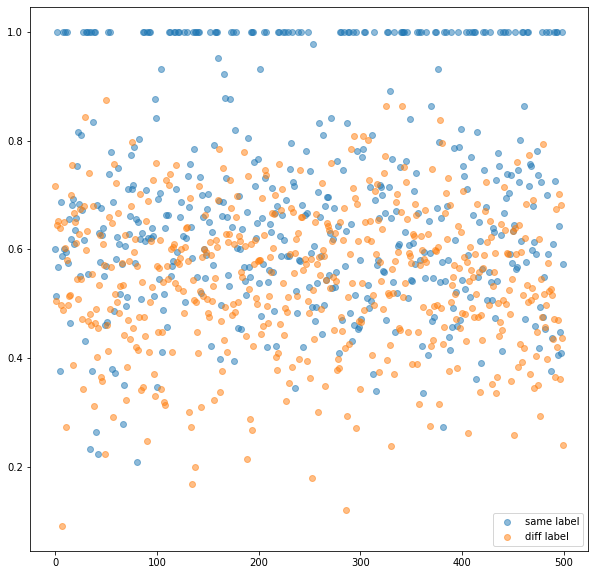

In [ ]:
# Distribution of cosine score of same_label class and diff_label class 
plt.figure(figsize=(10, 10))
plt.scatter([i for i in range(500)], sl[0], alpha = 0.5, label = 'same label')
plt.scatter([i for i in range(500)], dl[0], alpha = 0.5, label = 'diff label')
plt.legend()

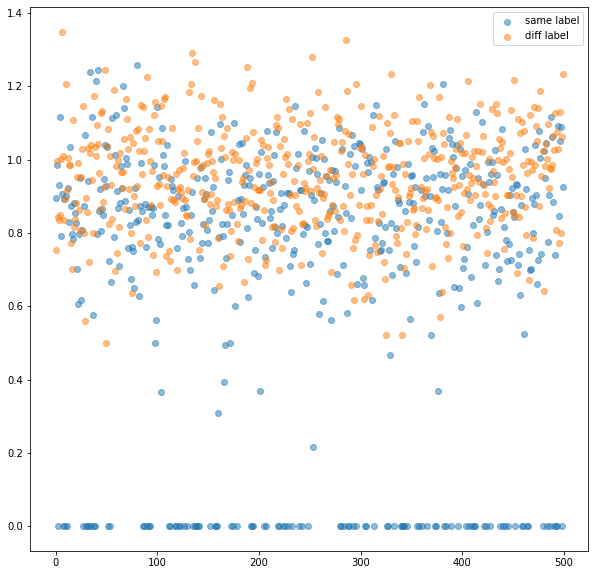

In [ ]:
# Distribution of euclide score of same_label class and diff_label class
plt.figure(figsize=(10, 10))
plt.scatter([i for i in range(500)], sl[1], alpha = 0.5, label = 'same label')
plt.scatter([i for i in range(500)], dl[1], alpha = 0.5, label = 'diff label')
plt.legend()

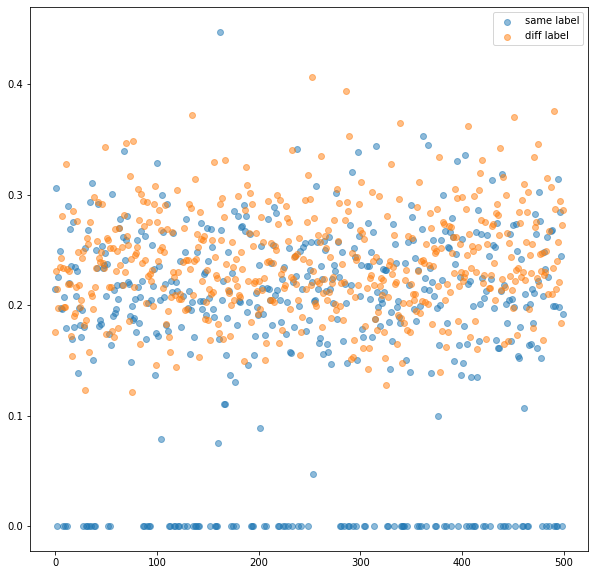

In [ ]:
# Distribution of manhattan score of same_label class and diff_label class
plt.figure(figsize=(10, 10))
plt.scatter([i for i in range(500)], sl[2], alpha = 0.5, label = 'same label')
plt.scatter([i for i in range(500)], dl[2], alpha = 0.5, label = 'diff label')
plt.legend()

# CREATE TFLITE MODEL WITH METADATA

In [ ]:
from tflite_support import flatbuffers
from tflite_support import metadata as _metadata
from tflite_support import metadata_schema_py_generated as _metadata_fb

In [ ]:
model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "R50_Recognition"
model_meta.description = ("Embedding image to vector for comparing purpose")
model_meta.vesion = "v0"
model_meta.author = "TensorFlow"
model_meta.license = ("Apache License. Version 2.0 "
                      "http://www.apache.org/licenses/LICENSE-2.0.")

In [ ]:
# Creates input info.
input_meta = _metadata_fb.TensorMetadataT()

# Creates output info.
output_meta = _metadata_fb.TensorMetadataT()

In [ ]:
input_meta.name = "image"
input_meta.description = (
    "Face detected image. The expected image is {0} x {1}, with "
    "three channels (red, blue, and green) per pixel. Each value in the "
    "tensor is a single byte between 0 and 255.".format(112, 112))
input_meta.content = _metadata_fb.ContentT()
input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
input_meta.content.contentProperties.colorSpace = (
    _metadata_fb.ColorSpaceType.RGB)
input_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.ImageProperties)
input_normalization = _metadata_fb.ProcessUnitT()
input_normalization.optionsType = (
    _metadata_fb.ProcessUnitOptions.NormalizationOptions)
input_normalization.options = _metadata_fb.NormalizationOptionsT()
input_normalization.options.mean = [127.5]
input_normalization.options.std = [127.5]
input_meta.processUnits = [input_normalization]
input_stats = _metadata_fb.StatsT()
input_stats.max = [255]
input_stats.min = [0]
input_meta.stats = input_stats

In [ ]:
# Creates output info.
output_meta = _metadata_fb.TensorMetadataT()
output_meta.name = "vector embedding"
output_meta.description = "Encoded vector"
output_meta.content = _metadata_fb.ContentT()
output_meta.content.content_properties = _metadata_fb.FeaturePropertiesT()
output_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_stats = _metadata_fb.StatsT()
output_stats.max = [1.0]
output_stats.min = [0.0]
output_meta.stats = output_stats
label_file = _metadata_fb.AssociatedFileT()
label_file.name = os.path.basename("your_path_to_label_file")
label_file.description = "Labels for objects that the model can recognize."
label_file.type = _metadata_fb.AssociatedFileType.TENSOR_AXIS_LABELS
output_meta.associatedFiles = [label_file]


# ONNX MODEL

In [ ]:
ort_sess = ort.InferenceSession('/content/mxnet_exported_mfn.onnx')

In [ ]:
def calculate_similarity_btw_2_img_onnx(img1_path, img2_path, model):
  #Read Image
  img1 = cv2.imread(img1_path, cv2.IMREAD_COLOR)
  img2 = cv2.imread(img2_path, cv2.IMREAD_COLOR)
  img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

  # #Plot Image
  # plt.subplot(1, 2, 1)
  # plt.imshow(img1.reshape(112, 112, 3))
  # plt.subplot(1, 2, 2)
  # plt.imshow(img2.reshape(112, 112, 3))

  #Preprocess
  img1 = np.array(img1).astype(np.float32).reshape(3, 112, 112)
  img1 = img1/127.5
  img1 = img1-(127.5)
  
  img2 = np.array(img2).astype(np.float32).reshape(3, 112, 112)
  img2 = img2/255
  img2 = img2-(127.5)

  #output of model
  output1 = model.run(None, {'input.1':[img1]})
  output2 = model.run(None, {'input.1':[img2]})

  return [cosine_similarity(np.array(output1[0]), np.array(output2[0]))[0][0],
          np.linalg.norm(np.array(output1[0])-np.array(output2[0])),
          np.linalg.norm(np.array(output1[0])-np.array(output2[0]), 1)]

In [ ]:
class FaceRecognizeONNX:
    def __init__(self, model_file='models/onnx/faceRec_model.onnx'):
        assert model_file is not None
        self.model_file = model_file
        self.session = ort.InferenceSession(self.model_file, providers=['CUDAExecutionProvider'], provider_options=None)
        self.taskname = 'recognition'
        find_sub = False
        find_mul = False
        model = onnx.load(self.model_file)
        graph = model.graph
        for nid, node in enumerate(graph.node[:8]):
            if node.name.startswith('Sub') or node.name.startswith('_minus'):
                find_sub = True
            if node.name.startswith('Mul') or node.name.startswith('_mul'):
                find_mul = True
        if find_sub and find_mul:
            #mxnet arcface model
            input_mean = 0.0
            input_std = 1.0
        else:
            input_mean = 127.5
            input_std = 127.5
        self.input_mean = input_mean
        self.input_std = input_std
        if self.session is None:
            self.session = ort.InferenceSession(self.model_file, providers=['CUDAExecutionProvider'], provider_options=None)
        input_cfg = self.session.get_inputs()[0]
        input_shape = input_cfg.shape
        input_name = input_cfg.name
        self.input_size = tuple(input_shape[2:4][::-1])
        self.input_shape = input_shape
        outputs = self.session.get_outputs()
        output_names = []
        for out in outputs:
            output_names.append(out.name)
        self.input_name = input_name
        self.output_names = output_names
        assert len(self.output_names)==1
        self.output_shape = outputs[0].shape
        self.l = threading.Lock()

    def get_faces_feature(self, imgs):
        with self.l:
            if not isinstance(imgs, list):
                imgs = [imgs]
            input_size = self.input_size
            print(self.input_std, self.input_mean)
            
            blob = cv2.dnn.blobFromImages(imgs, 1.0 / self.input_std, input_size,
                                        (self.input_mean, self.input_mean, self.input_mean), swapRB=True)
            net_out = self.session.run(self.output_names, {self.input_name: blob})[0]
            embeddings = preprocessing.normalize(net_out)
            return embeddings

In [ ]:
model = FaceRecognizeONNX(model_file='/content/mxnet_exported_mfn.onnx')
img = cv2.imread('/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_4/0.jpg', cv2.IMREAD_COLOR)
embedded = model.get_faces_feature(img)

In [ ]:
same_list = []

looped_id = []

for i in tqdm_notebook(range(500)):
  n = random.randint(0,1000)
  m = random.randint(0, 4)
  if n not in looped_id:
    img1 = cv2.imread('/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_{}/{}.jpg'.format(n, m))
    img2 = cv2.imread('/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_{}/{}.jpg'.format(n, 4-m))
    output1 = model.get_faces_feature(img1)
    output2 = model.get_faces_feature(img2)
    same_list.append([cosine_similarity(np.array(output1), np.array(output2))[0][0],
                      np.linalg.norm(np.array(output1[0])-np.array(output2[0])),
                      np.linalg.norm(np.array(output1[0])-np.array(output2[0]), 1)])
    looped_id.append(n)
  else:
    img1 = cv2.imread('/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_{}/{}.jpg'.format(n+m, m))
    img2 = cv2.imread('/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_{}/{}.jpg'.format(n+m, 4-m))
    output1 = model.get_faces_feature(img1)
    output2 = model.get_faces_feature(img2)
    same_list.append([cosine_similarity(np.array(output1), np.array(output2))[0][0],
                      np.linalg.norm(np.array(output1[0])-np.array(output2[0])),
                      np.linalg.norm(np.array(output1[0])-np.array(output2[0]), 1)])
    
    looped_id.append(n+m)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/FaceID/TomHardy2.jpeg')
img2 = cv2.imread('/content/drive/MyDrive/FaceID/TomCruise2.jpeg')
output1 = model.get_faces_feature(img1)
output2 = model.get_faces_feature(img2)
same_list.append([cosine_similarity(np.array(output1), np.array(output2))[0][0],
                  np.linalg.norm(np.array(output1[0])-np.array(output2[0])),
                  np.linalg.norm(np.array(output1[0])-np.array(output2[0]), 1)])

NameError: ignored

In [ ]:
dif_list = []

looped_id = []

for i in tqdm_notebook(range(500)):
  n = random.randint(0,250)
  z = random.randint(251,500)
  m = random.randint(0, 4)
  img1 = cv2.imread('/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_{}/{}.jpg'.format(n, m))
  img2 = cv2.imread('/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_{}/{}.jpg'.format(z, 4-m))
  output1 = model.get_faces_feature(img1)
  output2 = model.get_faces_feature(img2)
  dif_list.append([cosine_similarity(np.array(output1), np.array(output2))[0][0],
                   np.linalg.norm(np.array(output1[0])-np.array(output2[0])),
                   np.linalg.norm(np.array(output1[0])-np.array(output2[0]), 1)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
same_list = np.array(same_list)
dif_list = np.array(dif_list)
sl = same_list.T
dl = dif_list.T

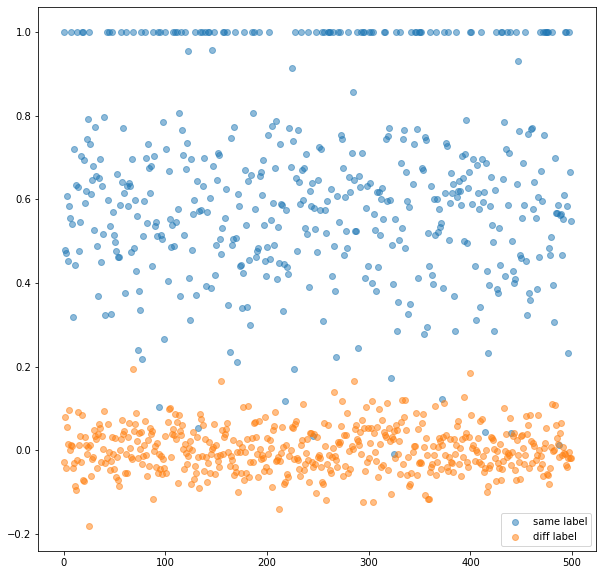

In [ ]:
# Distribution of cosine score of same_label class and diff_label class 
plt.figure(figsize=(10, 10))
plt.scatter([i for i in range(500)], sl[0], alpha = 0.5, label = 'same label')
plt.scatter([i for i in range(500)], dl[0], alpha = 0.5, label = 'diff label')
plt.legend()

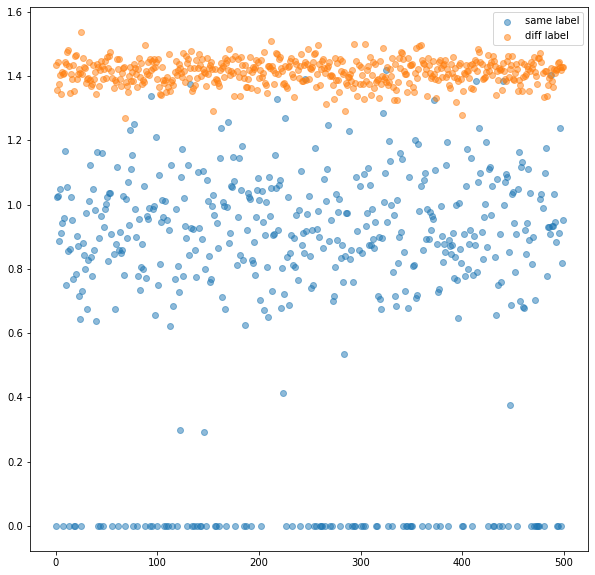

In [ ]:
# Distribution of euclide score of same_label class and diff_label class
plt.figure(figsize=(10, 10))
plt.scatter([i for i in range(500)], sl[1], alpha = 0.5, label = 'same label')
plt.scatter([i for i in range(500)], dl[1], alpha = 0.5, label = 'diff label')
plt.legend()

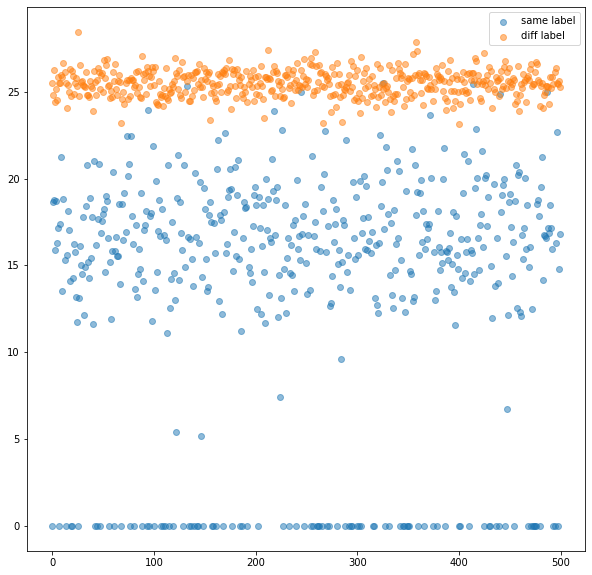

In [ ]:
# Distribution of manhattan score of same_label class and diff_label class
plt.figure(figsize=(10, 10))
plt.scatter([i for i in range(500)], sl[2], alpha = 0.5, label = 'same label')
plt.scatter([i for i in range(500)], dl[2], alpha = 0.5, label = 'diff label')
plt.legend()

# TESTING


In [ ]:
# Calculate cosine, euclide, mahattan similarity btw same person
same_list = []

looped_id = []

for i in tqdm_notebook(range(500)):
  n = random.randint(0,1000)
  m = random.randint(0, 4)
  if n not in looped_id:
    same_list.append(calculate_similarity_btw_2_img_onnx('/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_{}/{}.jpg'.format(n, m), 
                                                         '/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_{}/{}.jpg'.format(n, 4-m), 
                                                         ort_sess))
    looped_id.append(n)
  else:
    same_list.append(calculate_similarity_btw_2_img_onnx('/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_{}/{}.jpg'.format(n+m, m), 
                                                         '/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_{}/{}.jpg'.format(n+m, 4-m), 
                                                         ort_sess))
    looped_id.append(n+m)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
# Calculate cosine, euclide, mahattan similarity btw difference person
dif_list = []

looped_id = []

for i in tqdm_notebook(range(500)):
  n = random.randint(0,250)
  z = random.randint(251,500)
  m = random.randint(0, 4)
  dif_list.append(calculate_similarity_btw_2_img_onnx('/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_{}/{}.jpg'.format(n, m), 
                                                      '/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_{}/{}.jpg'.format(z, 4-m), 
                                                      ort_sess))
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
same_list = np.array(same_list)
dif_list = np.array(dif_list)
sl = same_list.T
dl = dif_list.T

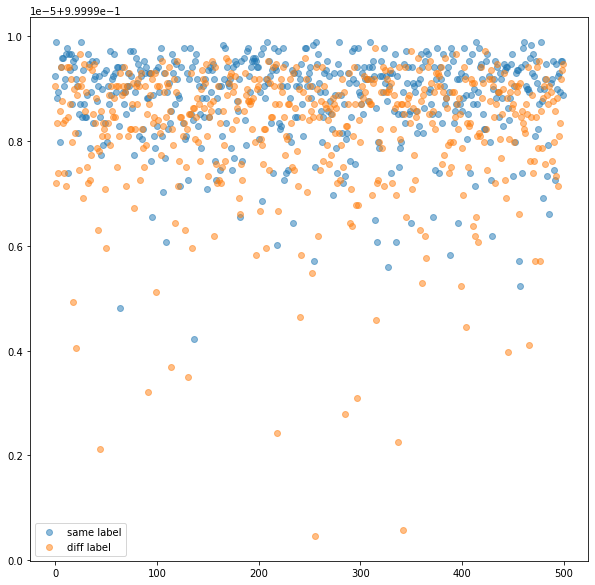

In [ ]:
# Distribution of cosine score of same_label class and diff_label class 
plt.figure(figsize=(10, 10))
plt.scatter([i for i in range(500)], sl[0], alpha = 0.5, label = 'same label')
plt.scatter([i for i in range(500)], dl[0], alpha = 0.5, label = 'diff label')
plt.legend()

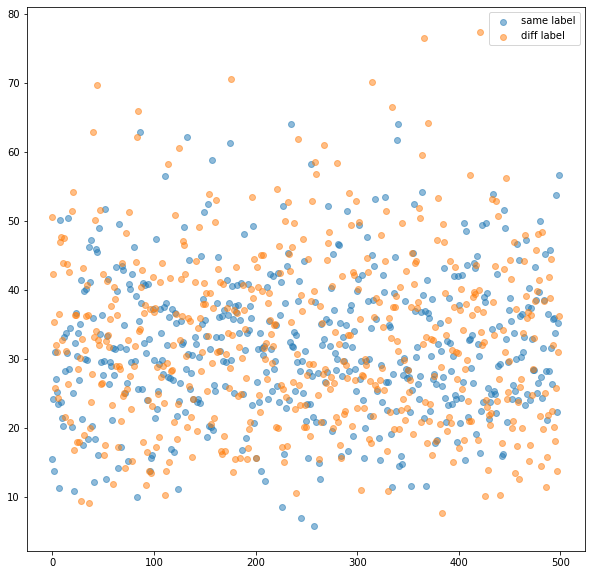

In [ ]:
# Distribution of euclide score of same_label class and diff_label class
plt.figure(figsize=(10, 10))
plt.scatter([i for i in range(500)], sl[1], alpha = 0.5, label = 'same label')
plt.scatter([i for i in range(500)], dl[1], alpha = 0.5, label = 'diff label')
plt.legend()

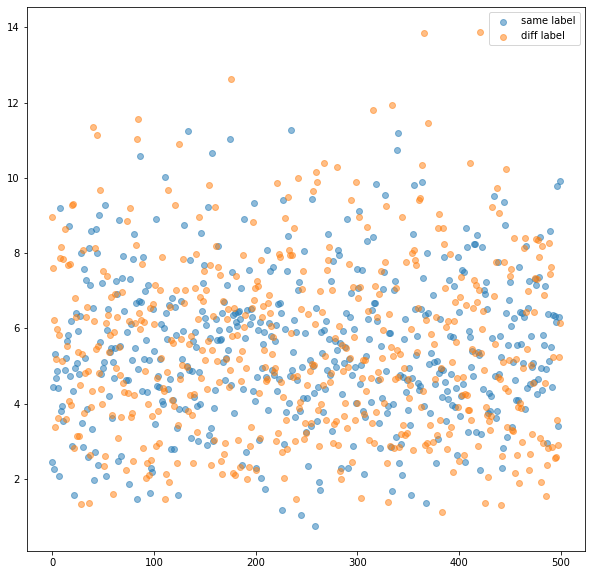

In [ ]:
# Distribution of manhattan score of same_label class and diff_label class
plt.figure(figsize=(10, 10))
plt.scatter([i for i in range(500)], sl[2], alpha = 0.5, label = 'same label')
plt.scatter([i for i in range(500)], dl[2], alpha = 0.5, label = 'diff label')
plt.legend()

In [ ]:
#!conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.0
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

In [ ]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
img1_path = '/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_1/0.jpg'
img2_path = '/content/drive/MyDrive/FaceID/Data_for_testing_purpose/label_0/4.jpg'

image1 = preprocess(Image.open(img1_path)).unsqueeze(0).to(device)
image2 = preprocess(Image.open(img2_path)).unsqueeze(0).to(device)

with torch.no_grad():
    image1 = model.encode_image(image1).detach().cpu().numpy()
    image2 = model.encode_image(image2).detach().cpu().numpy()
    
print('cosine similarity: ',cosine_similarity(image1, image2))
print('euclide similarity: ', np.linalg.norm(image1 - image2))
print('mahattan similarity: ', np.linalg.norm(image1 - image2, 1))